## Goal : Advertising Budget Optimization using Linear Regression

## Problem Statement
Businesses often distribute their advertising budgets across different channels such as TV, Radio, and Newspaper without clear insight into which medium gives the best returns. Inefficient allocation can lead to wasted marketing spend and lower sales performance.
This project aims to analyze the relationship between advertising expenditures and sales revenue, build a predictive model, and identify the most effective channel(s) for budget allocation.

## Why Use Linear Regression?
1. Simplicity and InterpretabilityLinear Regression is simple to implement and provides interpretable coefficients that show how each ad channel (TV, Radio, Newspaper) affects sales.

2. Predictive Capability
The goal is to predict a continuous outcome — Sales ($), which makes linear regression a natural choice.

 It’s effective when the relationship between the input features (budgets) and target variable (sales) is approximately linear.

3. Feature Importance
Linear regression coefficients directly show the importance of each feature (TV, Radio, Newspaper), which helps in making marketing decisions about which channel to invest more in.

4. Baseline Model
Linear regression serves as a good baseline model before trying more complex models (like decision trees or random forests).

5. Efficient and Fast
It trains very quickly, even on large datasets.




In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset "Advertising Budget and Sales.csv" into a pandas DataFrame.

In [136]:
df = pd.read_csv("Advertising Budget and Sales.csv")

Preview first five rows of the dataset.

In [137]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Check dataset dimensions (rows, columns).

In [138]:
df.shape

(200, 5)

Inspect column types and null values with .info().

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Generate statistical summary using .describe().

In [140]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Rename columns for simpler access (TV, Radio, Newspaper, Sales).

In [141]:
df = df.rename(columns={"Unnamed: 0":"Id","TV Ad Budget ($)": "TV", "Radio Ad Budget ($)": "Radio", "Newspaper Ad Budget ($)": "Newspaper","Sales ($)":"Sales"})

Display updated DataFrame.

In [142]:
df.head()

,Id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Check for missing values.

In [143]:
df.isna().sum()

,0
Id,0
TV,0
Radio,0
Newspaper,0
Sales,0


Plot Kernel Density Estimates (KDE) for TV, Radio, and Newspaper budgets.

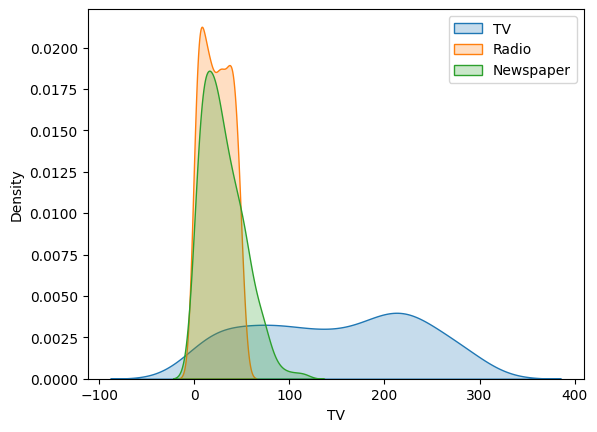

In [144]:
sns.kdeplot(df["TV"],label= "TV",fill=True)
sns.kdeplot(df["Radio"],label= "Radio",fill=True)
sns.kdeplot(df["Newspaper"],label= "Newspaper",fill=True)
plt.legend()
plt.show()

Create a pairplot to visualize relationships between all variables.

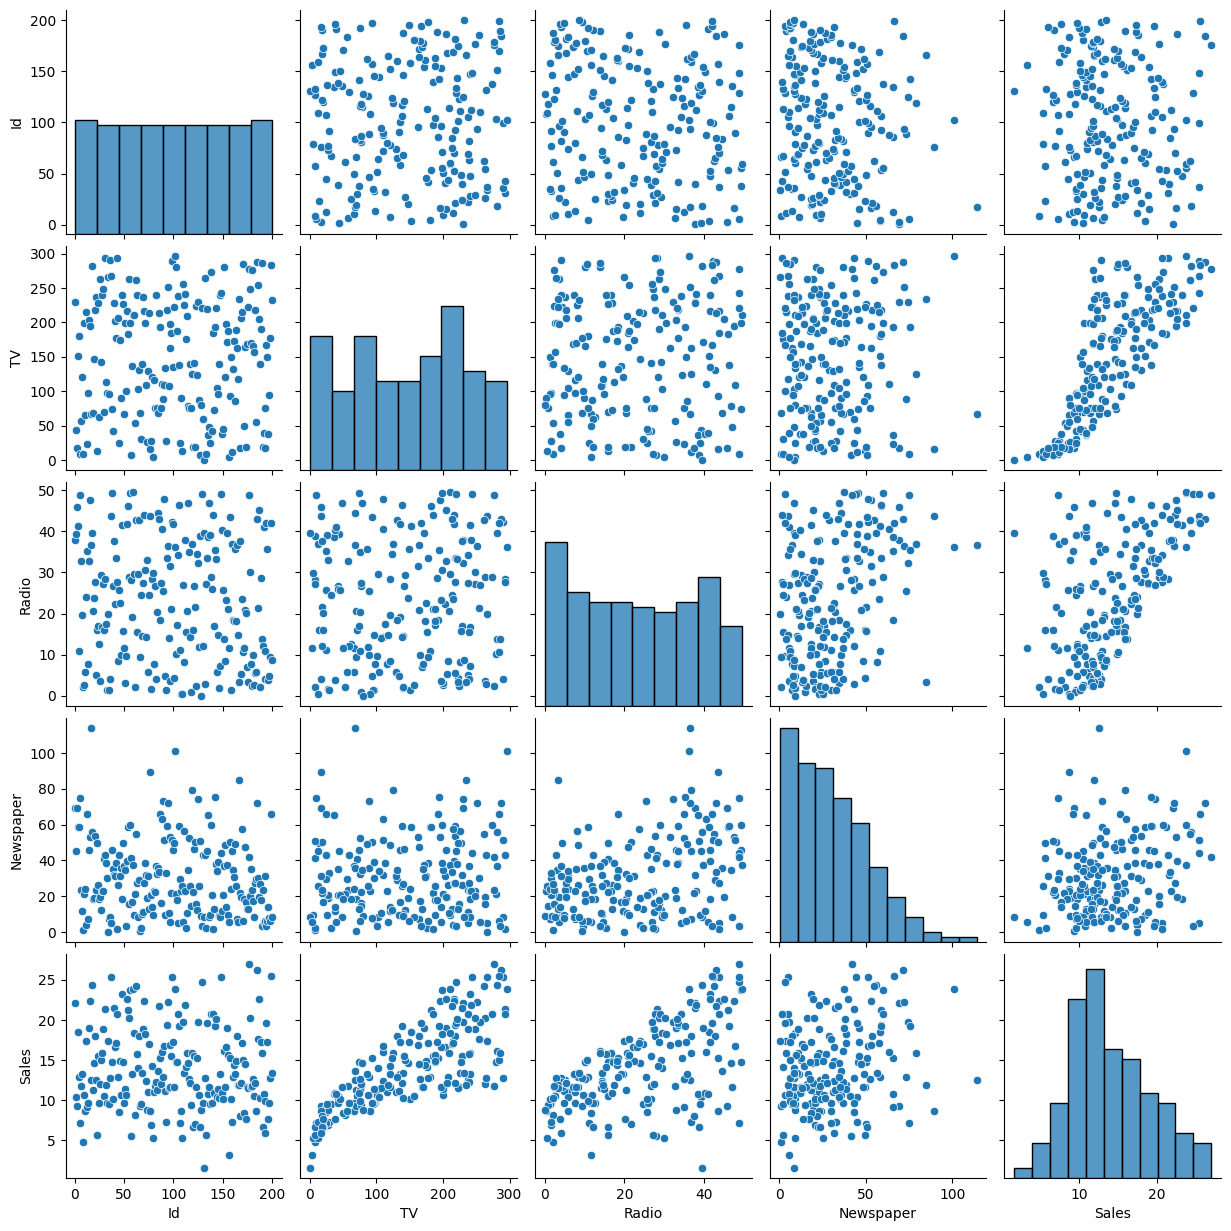

In [145]:
sns.pairplot(df)

Calculate correlation matrix.

In [146]:
cor = df.corr()

Plot heatmap of correlations.

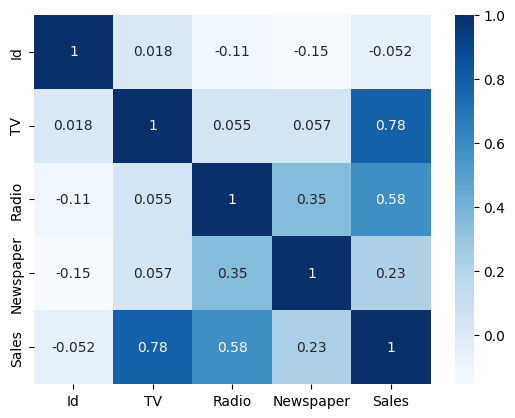

In [147]:
sns.heatmap(cor,annot=True,cmap="Blues")
plt.show()

Create boxplots for TV, Newspaper, and Radio to detect outliers.

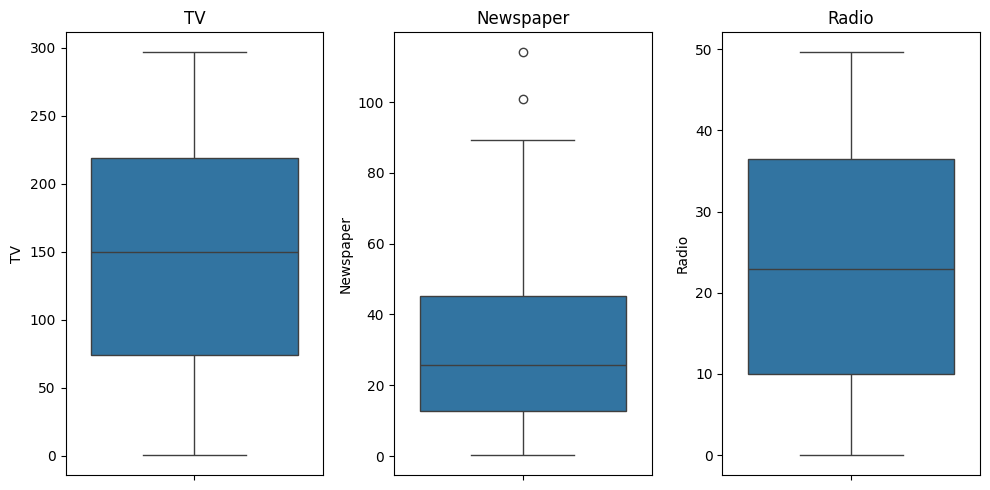

In [148]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df["TV"])
plt.title("TV")

plt.subplot(1, 3, 2)
sns.boxplot(y=df["Newspaper"])
plt.title("Newspaper")

plt.subplot(1, 3, 3)
sns.boxplot(y=df["Radio"])
plt.title("Radio")

plt.tight_layout()
plt.show()

Create histograms with KDE overlay for Newspaper, Radio, and TV budgets.

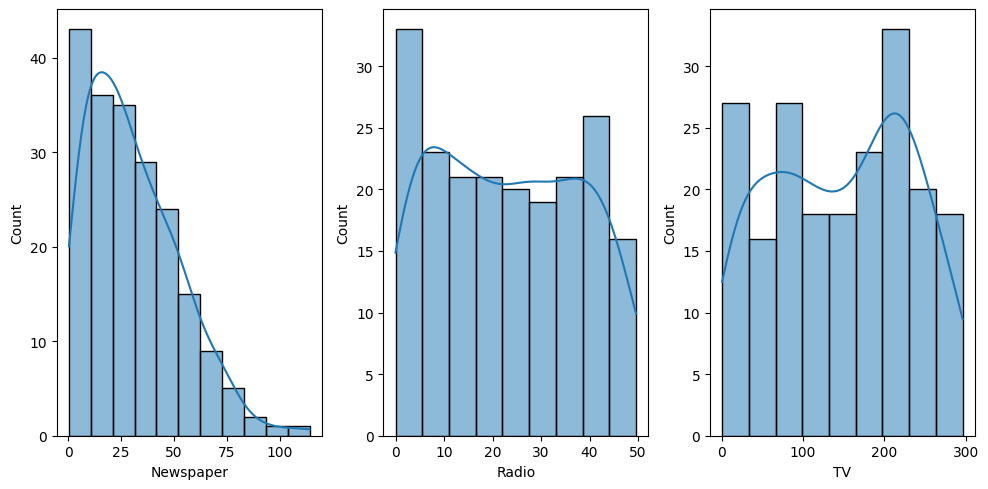

In [149]:
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
sns.histplot(df['Newspaper'],kde = True)
plt.subplot(1, 3, 2)
sns.histplot(df['Radio'],kde = True)
plt.subplot(1, 3, 3)
sns.histplot(df['TV'],kde = True)
plt.tight_layout()
plt.show()

## WithOut Remove Outlier

Split features (x) and target (y).

In [150]:
x = df.drop("Sales",axis=1)
y = df["Sales"]

Import scikit-learn modules for model training and evaluation.

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Split dataset into training and testing sets.

In [152]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Create and fit a LinearRegression model.

In [153]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Predict sales on test set.

In [154]:
y_pred = lr.predict(x_test)

Calculate R² score.

In [155]:
r2_score(y_test,y_pred)

0.898648915141708

Calculate Mean Squared Error (MSE).

In [156]:
mse = mean_squared_error(y_test,y_pred)
mse

3.1990044685889067

Calculate Mean Absolute Error (MAE).

In [157]:
mae = mean_absolute_error(y_test,y_pred)
mae

1.465060105010293

Scatter plot comparing actual vs. predicted sales.

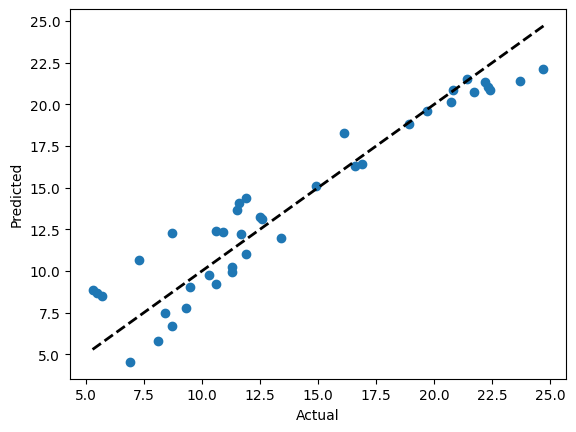

In [158]:
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw = 2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## Remove Outlier

Remove outliers in Newspaper using IQR method.

In [159]:
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[(df['Newspaper'] >= Q1 - 1.5*IQR) & (df['Newspaper'] <= Q3 + 1.5*IQR)].reset_index(drop=True)
display(df_cleaned.head())

,Id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Show shape of cleaned DataFrame.

In [160]:
df_cleaned.shape

(198, 5)

Redefine x and y after cleaning.

In [161]:
x = df_cleaned.drop("Sales",axis=1)
y = df_cleaned["Sales"]

Split cleaned dataset into train/test sets.

In [162]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Train second LinearRegression model.

In [163]:
lr2 = LinearRegression()
lr2.fit(x_train,y_train)

LinearRegression()

Predict on cleaned test set.

In [164]:
y_pred = lr2.predict(x_test)

Calculate R² score after cleaning.

In [165]:
r2_score(y_test,y_pred)

0.8990848341790882

Calculate MSE after cleaning.

In [166]:
mse2 = mean_squared_error(y_test,y_pred)
mse2

2.7371321340771724

Calculate MAE after cleaning.

In [167]:
mae2 = mean_absolute_error(y_test,y_pred)
mae2

1.2484792777279312

Scatter plot actual vs. predicted after cleaning.

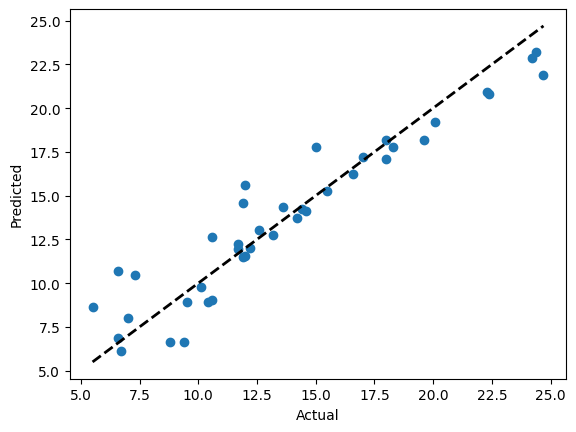

In [168]:
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw = 2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Display coefficients and intercept from first model (with outliers).

In [170]:
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [0.00064359 0.04471835 0.18925118 0.00304577]
Intercept: 2.9065270863618125


Display coefficients and intercept from second model (without outliers).

In [171]:
print("Coefficients:", lr2.coef_)
print("Intercept:", lr2.intercept_)

Coefficients: [-0.00033861  0.04524386  0.18231499  0.00494041]
Intercept: 3.0165238115646282


## Conclusion
The analysis demonstrates that allocating more budget to TV and Radio advertising is likely to result in better sales returns. The Linear Regression model provides a simple yet effective tool for predicting sales based on ad spend. Removing outliers improves prediction accuracy, particularly by mitigating the influence of extreme Newspaper ad budgets.